# The Binomial Model

**The beta distribution.** An uncertain quantity $\theta$, known to be between 0 and 1, has a $\text{beta}(a,b)$ distribution if

$$p(\theta)=\text{dbeta}(\theta,a,b)=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1} \quad \text{for} \quad 0\leq \theta \leq 1$$

**The binomial distribution.** A random variable $Y\in \{0,1,\ldots,n\}$ has the $\text{binomial}(n,\theta)$ distribution if

$$Pr(Y=y|\theta)=\text{dbinom}(y,n,\theta)=\binom{n}{y}\theta^{y}(1-\theta)^{n-y}, \quad y \in \{0,1,\ldots,n\}$$

**Posterior distribution.**

$$p(\theta|y)=\frac{p(\theta)p(y|\theta)}{p(y)} = \frac{1}{p(y)}\times \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}\times \binom{n}{y}\theta^{y}(1-\theta)^{n-y}$$

$$=c(n,y,a,b) \times \theta^{a+y-1}(1-\theta)^{b+n-y-1}= \text{dbeta}(\theta,a+y,b+n-y)=\text{dbeta}(\theta,a_{po},b_{po}) $$

**Posterior predictive distribution.**

$$p(\tilde{y}|y_{1},\ldots,y_{n})=\int p(\tilde{y},\theta|y_{1},\ldots,y_{n})d\theta=\int p(\tilde{y}|\theta,y_{1},\ldots,y_{n})p(\theta|y_{1},\ldots,y_{n})d\theta$$

$$=\int p(\tilde{y}|\theta)p(\theta|y_{1},\ldots,y_{n})d\theta= \int \binom{n}{y}\theta^{y}(1-\theta)^{n-y} \frac{\Gamma(a_{po}+b_{po})}{\Gamma(a_{po})\Gamma(b_{po})}\theta^{a_{po}-1}(1-\theta)^{b_{po}-1}d\theta $$

$$= \frac{\Gamma(a_{po}+b_{po})}{\Gamma(a_{po})\Gamma(b_{po})} \binom{n}{y}\int  \theta^{a_{po}+y-1}(1-\theta)^{b_{po}+n-y-1}d\theta = \frac{\Gamma(a_{po}+b_{po})}{\Gamma(a_{po})\Gamma(b_{po})} \binom{n}{y}\frac{\Gamma(a_{po}+y)\Gamma(b_{po}+n-y)}{\Gamma(a_{po}+b_{po}+n)}$$

$$ = \binom{n}{y}\frac{B(a_{po}+y,b_{po}+n-y)}{B(a_{po},b_{po})}= BetaBin (n,a_{po} ,b_{po} )$$

**Beta function.**

$$B(z_{1},z_{2})=\frac{\Gamma(z_{1})\Gamma(z_{2})}{\Gamma(z_{1}+z_{2})}=\int_{0}^{1}t^{z_{1}-1}(1-t)^{z_{2}-1}dt$$

In [49]:
import numpy as np
import matplotlib.pyplot as plt

0.41782462431258766


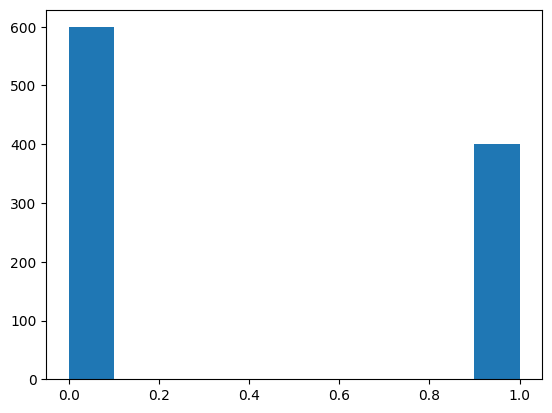

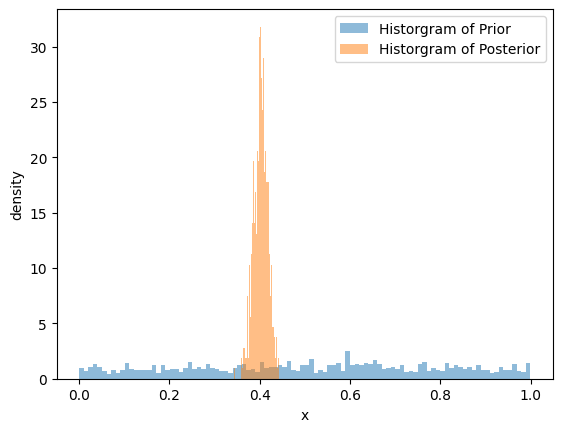

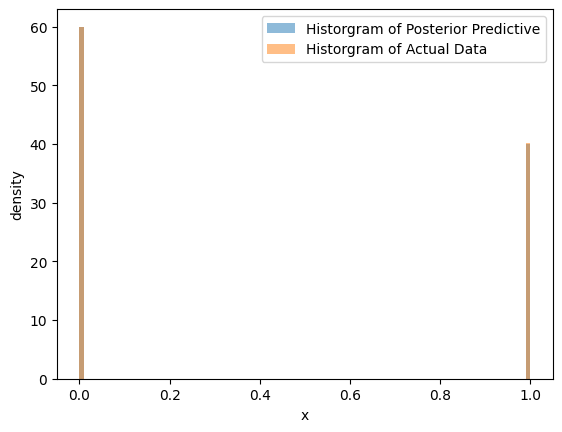

In [75]:
rng = np.random.default_rng(12345)
n= 1000
theta = rng.beta(1,1)
print(theta)
y = rng.binomial(1,theta, size = n)

plt.figure()
plt.hist(y)
plt.show()

a1=b1=1
s = sum(y)
a2 =a1+s
b2 =b1+n-s
prior = rng.beta(a1,b1,size =n)
posterior = rng.beta(a2,b2,size = n)
plt.figure()
plt.hist(prior, bins=100, density=True, alpha=0.5, label="Historgram of Prior")
plt.hist(posterior, bins=100, density=True, alpha=0.5, label="Historgram of Posterior")
plt.xlabel("x")
plt.ylabel("density")
plt.legend()
plt.show()

theta = [0]*n
pp = [0]*n
for i in range(n):
    theta[i] = rng.beta(a2,b2)
    pp[i] = rng.binomial(1,theta[i])
plt.figure()
plt.hist(pp, bins=100, density=True, alpha=0.5, label="Historgram of Posterior Predictive")
plt.hist(y, bins=100, density=True, alpha=0.5, label="Historgram of Actual Data")
plt.xlabel("x")
plt.ylabel("density")
plt.legend()
plt.show()

# The Poisson model

**The Gamma distribution.** An uncertain positive quantity $\theta$ has a $\text{gamma}(a,b)$ distribution if

$$p(\theta)=\text{dgamma}(\theta,a,b)=\frac{b^{a}}{\Gamma(a)}\theta^{a-1}e^{-b\theta}, \quad \text{for} \quad \theta,a,b>0$$

**The Poisson distribution.** A random variable $Y$ has a Poisson distribution with mean $\theta$ if

$$Pr(Y=y|\theta)=\text{dpois}(y,\theta)=\theta^{y}e^{-\theta}/y! \quad y\in \{0,1,2,\ldots \}$$

**Posterior distribution.**

$$p(\theta|y_{1},\ldots,y_{n})= \frac{p(\theta) \times p(y_{1},\ldots,y_{n}/\theta)}{p(y_{1},\ldots,y_{n})}=\theta^{a-1}e^{-b\theta}\times \theta^{\sum y_{i}}e^{-n\theta} \times c(y_{1},\ldots,y_{n},a,b)$$

$$=\theta^{a-1+\sum y_{i}}e^{-(b+n)\theta}= \text{dgamma}(\theta,a+\sum Y_{i},b+n)$$


**Posterior predictive distribution.**

$$p(\tilde{y}|y_{1},\ldots,y_{n})=\int p(\tilde{y},\theta|y_{1},\ldots,y_{n})d\theta=\int p(\tilde{y}|\theta,y_{1},\ldots,y_{n})p(\theta|y_{1},\ldots,y_{n})d\theta$$

$$=\int p(\tilde{y}|\theta)p(\theta|y_{1},\ldots,y_{n})d\theta= \int \frac{(b+n)^{a+\sum y_{i}}}{\Gamma(a+\sum y_{i})}\theta^{a+\sum y_{i}-1}e^{-(b+n)\theta} \theta^{\tilde{y}}e^{-\theta}/\tilde{y}!d\theta$$

$$=\frac{(b+n)^{a+\sum y_{i}}}{\Gamma(a+\sum y_{i})\Gamma(\tilde{y}+1)}\int_{0}^{\infty} \theta^{a+\sum y_{i} + \tilde{y}-1}e^{-(b+n+1)\theta}d\theta =\frac{(b+n)^{a+\sum y_{i}}}{\Gamma(a+\sum y_{i})\Gamma(\tilde{y}+1)}\frac{\Gamma(a+\sum y_{i}+\tilde{y})}{(b+n+1)^{a+\sum y_{i}+\tilde{y}}} $$


$$=\frac{\Gamma(a+\sum y_{i}+\tilde{y})}{\Gamma(a+\sum y_{i})\Gamma(\tilde{y}+1)} (\frac{b+n}{b+n+1})^{a+\sum y_{i}} (\frac{1}{b+n+1})^{\tilde{y}}= \text{NegBin}(a+\sum y_{i},b+n)$$

**Gamma function.**

$$\Gamma(z)= (n-1)!=\int_{0}^{\infty} t^{z-1}e^{-t}dt$$

0.8429317864635094


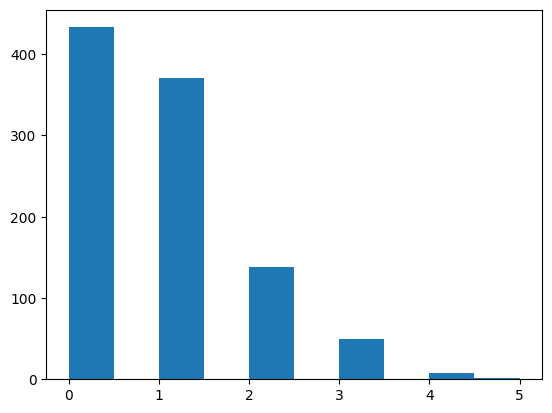

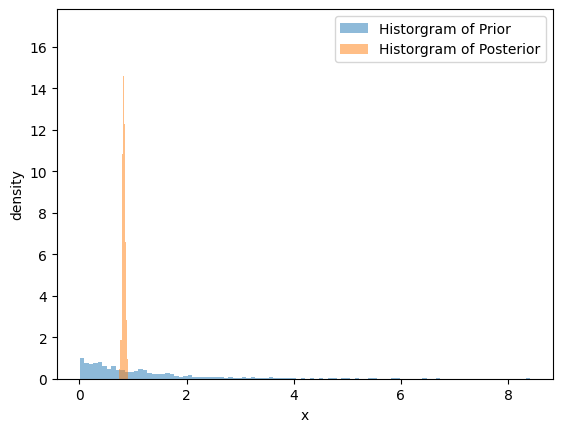

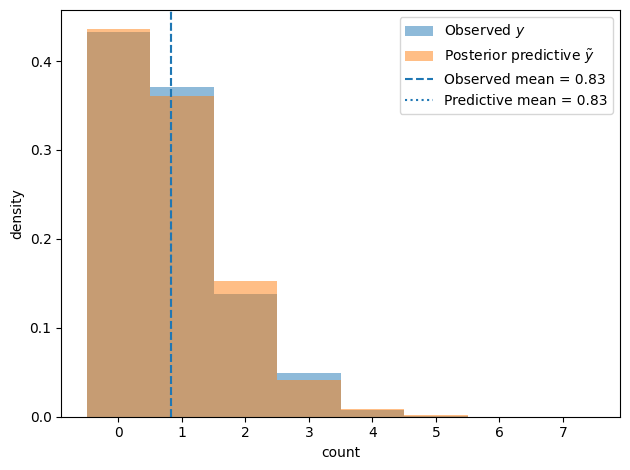

In [74]:
rng = np.random.default_rng(12345)
n= 1000
theta = rng.gamma(2,2)
print(theta)
y = rng.poisson(theta, size = n)

plt.figure()
plt.hist(y)
plt.show()

a1=b1=1
s = sum(y)
a2 =a1+s
b2 =b1+n
prior = rng.gamma(a1,1/b1,size =n)
posterior = rng.gamma(a2,1/b2,size = n)
plt.figure()
plt.hist(prior, bins=100, density=True, alpha=0.5, label="Historgram of Prior")
plt.hist(posterior, bins=100, density=True, alpha=0.5, label="Historgram of Posterior")
plt.xlabel("x")
plt.ylabel("density")
plt.legend()
plt.show()

S = 30000  
theta_draws = rng.gamma(shape=a2, scale=1.0/b2, size=S)  # scale = 1/rate
y_pred = rng.poisson(theta_draws)
lo = int(min(y.min(), y_pred.min()))
hi = int(max(y.max(), y_pred.max()))
bins = np.arange(lo, hi + 2) - 0.5
plt.figure()
plt.hist(y, bins=bins, density=True, alpha=0.5, label="Observed $y$")
plt.hist(y_pred, bins=bins, density=True, alpha=0.5, label="Posterior predictive $\\tilde y$")
obs_mean = y.mean()
pred_mean = y_pred.mean()
plt.axvline(obs_mean, linestyle="--", label=f"Observed mean = {obs_mean:.2f}")
plt.axvline(pred_mean, linestyle=":", label=f"Predictive mean = {pred_mean:.2f}")
plt.xlabel("count")
plt.ylabel("density")
plt.legend()
plt.tight_layout()
plt.show()

# The Galenshore model

$$Y \sim \text{Galenshore}(a,θ) \Rightarrow Z=\theta^2Y^2 \sim \text{Gamma}(a,1)$$

**The Galenshore distribution.** An unknown quantity $Y$ has a Galenshore$(a,\theta)$ distribution if its density is given by

$$p(y)=\frac{2}{\Gamma(a)}\theta^{2a}y^{2a-1}e^{-\theta^2y^2} \quad \text{for}\quad y>0,\theta>0, a>0$$

**Conjugate Prior distribution.**

$$p(\theta) \propto \theta^{2b-1}e^{-\phi^2\theta^2}= \text{Galenshore}(b,\phi)$$

**Posterior distribution.**

$$p(\theta|y_{1},\ldots,y_{n})\propto \frac{2}{\Gamma(a)}\theta^{2na}\prod y_{i}^{2a-1}e^{-\theta^2\sum y_{i}^2}\theta^{2b-1}e^{-\phi^2\theta^2}\propto \theta^{2(na+b)-1}e^{-(\phi^2+\sum y_{i}^2)\theta^2}=\text{Galenshore}(b+na,\sqrt{\phi^2+\sum y_{i}^2})$$

**Posterior predictive distribution.**

$$p(\tilde{y}|y_{1},\ldots,y_{n})=\int p(\tilde{y},\theta|y_{1},\ldots,y_{n})d\theta=\int p(\tilde{y}|\theta,y_{1},\ldots,y_{n})p(\theta|y_{1},\ldots,y_{n})d\theta$$

$$=\int p(\tilde{y}|\theta)p(\theta|y_{1},\ldots,y_{n})d\theta= \int \frac{2}{\Gamma(a)}\theta^{2a}\tilde{y}^{2a-1}e^{-\theta^2\tilde{y}^2}\times \frac{2}{\Gamma(na+b)}(\phi^2+\sum y_{i}^2)^{na+b}\theta^{2(na+b)-1}e^{-(\phi^2+\sum y_{i}^2)\theta^2}d \theta$$

$$ =\frac{4}{\Gamma(a)\Gamma(na+b)}(\phi^2+\sum y_{i}^2)^{na+b}\tilde{y}^{2a-1}\int \theta^{2(a+na+b)-1}e^{-(\tilde{y} + \phi^2+\sum_{i}^2)\theta^2}d\theta=\frac{4}{\Gamma(a)\Gamma(na+b)}(\phi^2+\sum y_{i}^2)^{na+b}\tilde{y}^{2a-1} \times \frac{\Gamma(a+an+b)}{2(\tilde{y}^2+\sum y_{i}^2+\phi^2)^{a+an+b}}$$

$$ =\frac{2}{B(a)\Gamma(na+b)}(\phi^2+\sum y_{i}^2)^{na+b}\tilde{y}^{2a-1} \times (\tilde{y}^2+\sum y_{i}^2+\phi^2)^{-(a+an+b)}$$

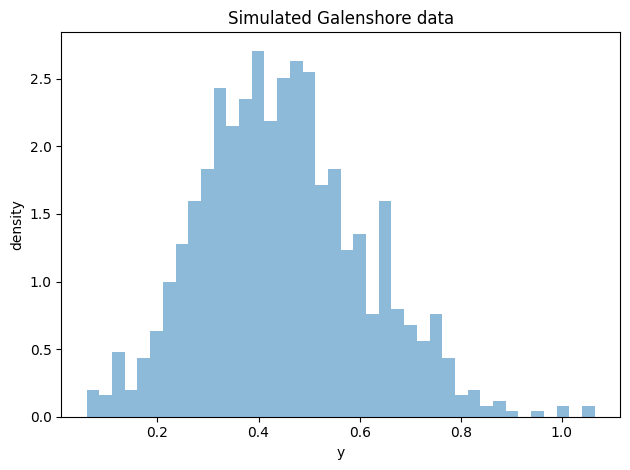

Posterior parameters: b_post = 2001.00, phi_post = 15.12


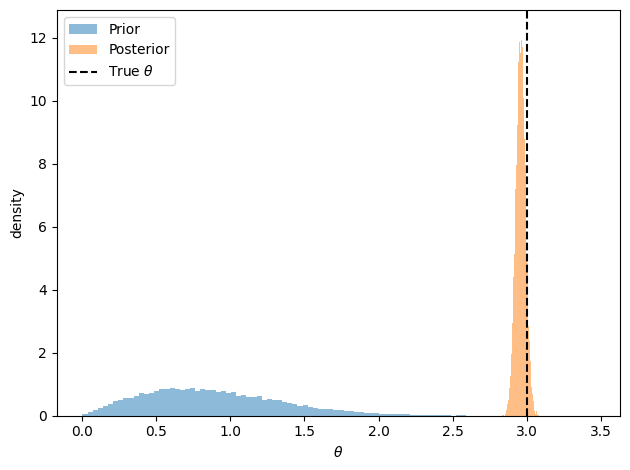

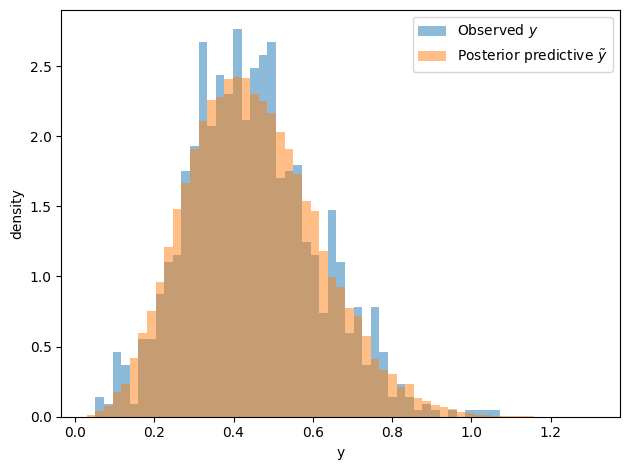

In [70]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(12345)


def r_galenshore(a, theta, size=1, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    z = rng.gamma(shape=a, scale=1.0, size=size)  
    return np.sqrt(z) / theta


# ---------- 1. Generate data ----------
a = 2.0          # fixed (known) a in the likelihood
theta_true = 3.0 # true parameter
n = 1000

y = r_galenshore(a, theta_true, size=n, rng=rng)

plt.figure()
plt.hist(y, bins=40, density=True, alpha=0.5)
plt.xlabel("y")
plt.ylabel("density")
plt.title("Simulated Galenshore data")
plt.tight_layout()
plt.show()


# ---------- 2. Prior on theta and posterior ----------
# Prior:  theta ~ Galenshore(b, phi)
b = 1.0
phi = 1.0

# Posterior: theta | y ~ Galenshore(b + n*a, sqrt(phi^2 + sum(y_i^2)))
b_post = b + n * a
phi_post = np.sqrt(phi**2 + np.sum(y**2))

print(f"Posterior parameters: b_post = {b_post:.2f}, phi_post = {phi_post:.2f}")

# Draw samples from prior and posterior for theta
S = 30_000
theta_prior = r_galenshore(b,      phi,      size=S, rng=rng)
theta_post  = r_galenshore(b_post, phi_post, size=S, rng=rng)

plt.figure()
plt.hist(theta_prior, bins=100, density=True, alpha=0.5, label="Prior")
plt.hist(theta_post,  bins=100, density=True, alpha=0.5, label="Posterior")
plt.axvline(theta_true, linestyle="--", color="k", label=r"True $\theta$")
plt.xlabel(r"$\theta$")
plt.ylabel("density")
plt.legend()
plt.tight_layout()
plt.show()


# ---------- 3. Posterior predictive ----------
# Posterior predictive: draw theta ~ posterior, then y_tilde | theta ~ Galenshore(a, theta)
z_pred = rng.gamma(shape=a, scale=1.0, size=S)   # Gamma(a,1)
y_pred = np.sqrt(z_pred) / theta_post           # elementwise division

lo = min(y.min(), y_pred.min())
hi = max(y.max(), y_pred.max())
bins = np.linspace(lo, hi, 60)

plt.figure()
plt.hist(y,      bins=bins, density=True, alpha=0.5, label="Observed $y$")
plt.hist(y_pred, bins=bins, density=True, alpha=0.5, label="Posterior predictive $\\tilde y$")
plt.xlabel("y")
plt.ylabel("density")
plt.legend()
plt.tight_layout()
plt.show()


# The Normal Model

##  Inference for the mean, conditional on the variance

**The Normal distribution.** A random variable $Y$ is said to be normally distributed with mean and variance $\sigma^2>0$ if the density of $Y$ is given by

$$p(y|\theta,\sigma^2)=\frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{1}{2}(\frac{y-\theta}{\sigma})^2}, \quad -\infty <y<\infty$$

**Conjugate Prior distribution.** 

$$\theta \sim N(m_{0},\tau_{0}^2)$$

**Posterior distribution.**

$$p(\theta|y)=\frac{p(\theta)p(y|\theta)}{p(y)} \propto \exp \{-\frac{1}{2\tau_{0}}(\theta-\mu_{0})^2\} \exp \{ -\frac{1}{2\sigma^2}\sum(y_{i}-\theta)^2\}$$

$$= \exp\{(\frac{1}{\tau_{0}^2}+\frac{n}{\sigma^2})\theta^2-2(\frac{\mu_{0}}{\tau_{0}^2}+\frac{\sum y_{i}}{\sigma^2})\theta\}\sim N(\frac{\frac{\mu_{0}}{\tau_{0}^2}+\frac{\sum y_{i}}{\sigma^2}}{\frac{1}{\tau_{0}^2}+\frac{n}{\sigma^2}},\frac{1}{\frac{1}{\tau_{0}^2}+\frac{n}{\sigma^2}})= N(\mu_{n},\tau_{n}^2)$$

**Posterior predictive distribution.**

$$p(\tilde{y}|y_{1},\ldots,y_{n})=\int p(\tilde{y},\theta|y_{1},\ldots,y_{n})d\theta \sim N(\mu_{0},\tau_{n}^2+\sigma^2)$$

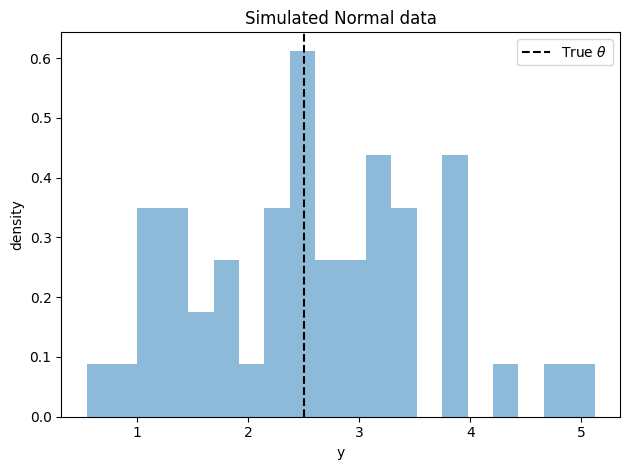

Posterior mean mu_n = 2.555, posterior sd tau_n = 0.141


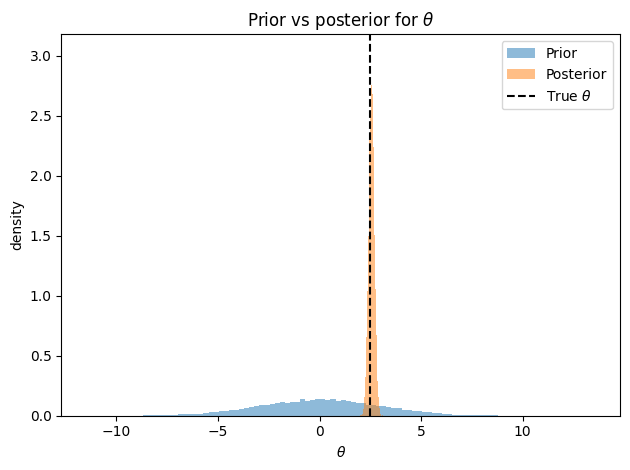

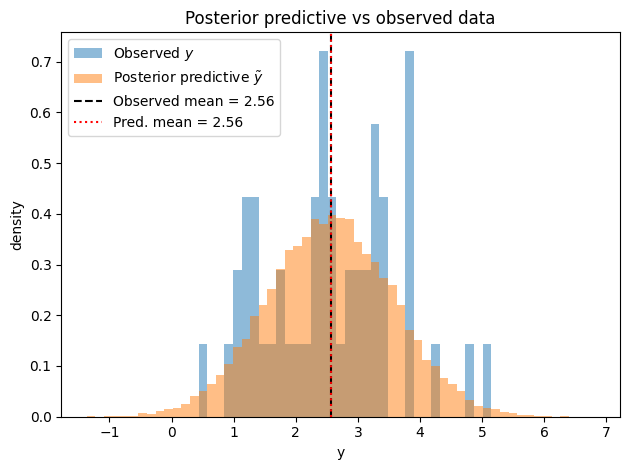

In [72]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(12345)

# --------------------------------------------------------
# 1. Generate data from the Normal model (theta unknown, sigma^2 known)
# --------------------------------------------------------
theta_true = 2.5      # true mean
sigma = 1.0           # known standard deviation
n = 50                # sample size

y = rng.normal(loc=theta_true, scale=sigma, size=n)

plt.figure()
plt.hist(y, bins=20, density=True, alpha=0.5)
plt.axvline(theta_true, linestyle="--", color="k", label=r"True $\theta$")
plt.xlabel("y")
plt.ylabel("density")
plt.title("Simulated Normal data")
plt.legend()
plt.tight_layout()
plt.show()


# --------------------------------------------------------
# 2. Prior and posterior for theta
# Prior: theta ~ N(m0, tau0^2)
# Posterior: theta | y ~ N(mu_n, tau_n^2)
# --------------------------------------------------------
m0 = 0.0      # prior mean
tau0 = 3.0    # prior std dev
tau0_sq = tau0**2

# Sufficient stats
y_bar = y.mean()

# Posterior variance and mean (precision form)
tau_n_sq = 1.0 / (1.0 / tau0_sq + n / sigma**2)
mu_n = tau_n_sq * (m0 / tau0_sq + n * y_bar / sigma**2)

print(f"Posterior mean mu_n = {mu_n:.3f}, posterior sd tau_n = {np.sqrt(tau_n_sq):.3f}")

# Sample from prior and posterior
S = 30_000
theta_prior = rng.normal(loc=m0,    scale=tau0,            size=S)
theta_post  = rng.normal(loc=mu_n,  scale=np.sqrt(tau_n_sq), size=S)

plt.figure()
plt.hist(theta_prior, bins=100, density=True, alpha=0.5, label="Prior")
plt.hist(theta_post,  bins=100, density=True, alpha=0.5, label="Posterior")
plt.axvline(theta_true, linestyle="--", color="k", label=r"True $\theta$")
plt.xlabel(r"$\theta$")
plt.ylabel("density")
plt.title("Prior vs posterior for $\\theta$")
plt.legend()
plt.tight_layout()
plt.show()


# --------------------------------------------------------
# 3. Posterior predictive distribution
# y_tilde | y ~ N(mu_n, tau_n^2 + sigma^2)
# --------------------------------------------------------
sigma_pred_sq = tau_n_sq + sigma**2
y_pred = rng.normal(loc=mu_n, scale=np.sqrt(sigma_pred_sq), size=S)

lo = min(y.min(), y_pred.min())
hi = max(y.max(), y_pred.max())
bins = np.linspace(lo, hi, 60)

plt.figure()
plt.hist(y,      bins=bins, density=True, alpha=0.5, label="Observed $y$")
plt.hist(y_pred, bins=bins, density=True, alpha=0.5, label="Posterior predictive $\\tilde y$")
plt.axvline(y_bar, linestyle="--", color="k", label=f"Observed mean = {y_bar:.2f}")
plt.axvline(y_pred.mean(), linestyle=":", color="r", label=f"Pred. mean = {y_pred.mean():.2f}")
plt.xlabel("y")
plt.ylabel("density")
plt.title("Posterior predictive vs observed data")
plt.legend()
plt.tight_layout()
plt.show()


## Joint inference for the mean and variance

**Conjugate Prior distribution.** 

$$p(\theta,1/\sigma^2)=p(\theta|1/\sigma^2)p(1/\sigma^2)=\text{normal}(\mu_{0},\sigma^2/\kappa_{0})\times \text{gamma}(v_{0}/2,v_{0}\sigma_{0}^2/2)$$

**Posterior distribution.**

$$p(\theta,1/\sigma^2|y_{1},\ldots,y_{n})=p(\theta|1/\sigma^2,y_{1},\ldots,y_{n})p(1/\sigma^2|y_{1},\ldots,y_{n})$$

$$\{\theta|y_{1},\ldots,y_{n},\sigma^2\} \sim \text{normal}(\mu_{n},\sigma^2/\kappa_{n}), \quad \kappa_{n} = \kappa_{0}+n, \quad \mu_{n} = \frac{\kappa_{0}\mu_{0}+\sum y_{i}}{\kappa_{n}}$$

$$p(\sigma^2|y_{1},\ldots,y_{n})\propto p(\sigma^2) \int p(y_{1},\ldots,y_{n}|\theta,\sigma^2)p(\theta|\sigma^2)d\theta$$

$$\{1/\sigma^2|y_{1},\ldots,y_{n}\} \sim \text{gamma}(v_{n}/2,v_{n}\sigma_{n}^2/2), \quad v_{n}=v_{0}+n, \quad \sigma_{n}^2= \frac{1}{v_{n}}[v_{0}\sigma_{0}^2+(n-1)s^2+\frac{\kappa_{0}n}{\kappa_{n}}(\bar{y}-\mu_{0})^2], \quad s^2=\frac{\sum (y_{i}-\bar{y})^2}{n-1}$$

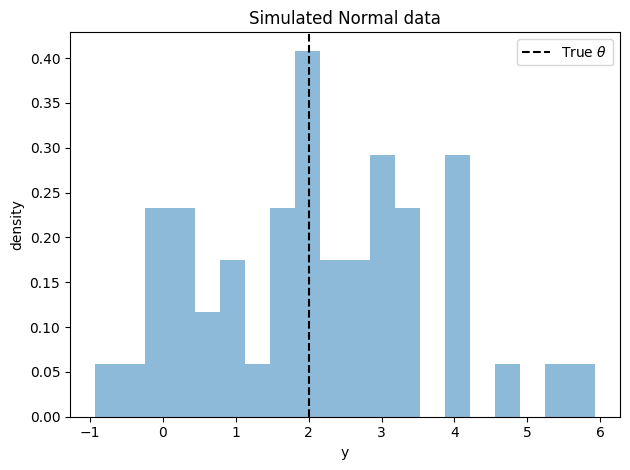

Posterior mu_n      = 2.050
Posterior kappa_n   = 51.000
Posterior v_n       = 54.000
Posterior sigma_n^2 = 2.482


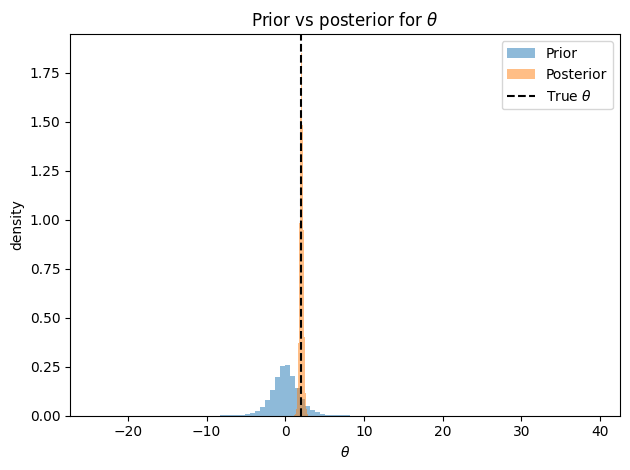

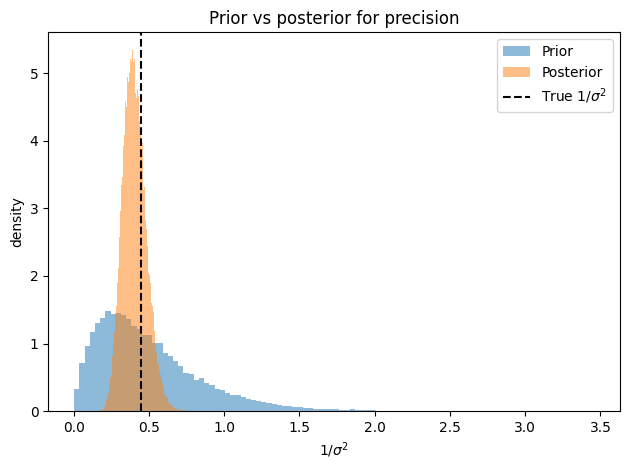

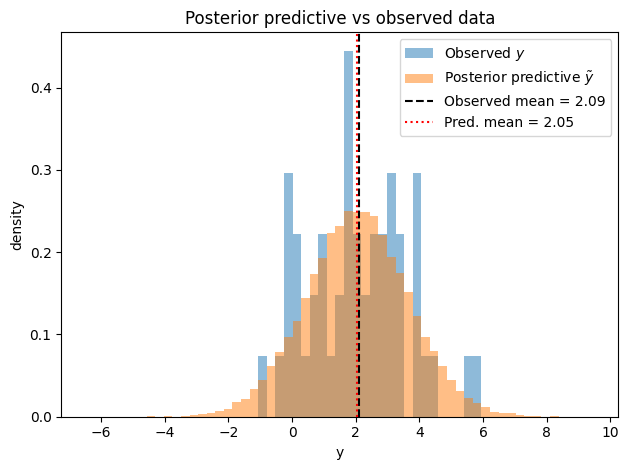

In [76]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(12345)

# --------------------------------------------------------
# 1. Simulate data from Normal(theta_true, sigma_true^2)
# --------------------------------------------------------
theta_true = 2.0
sigma_true = 1.5
n = 50

y = rng.normal(loc=theta_true, scale=sigma_true, size=n)

plt.figure()
plt.hist(y, bins=20, density=True, alpha=0.5)
plt.axvline(theta_true, linestyle="--", color="k", label=r"True $\theta$")
plt.xlabel("y")
plt.ylabel("density")
plt.title("Simulated Normal data")
plt.legend()
plt.tight_layout()
plt.show()

# Sufficient stats
y_bar = y.mean()
s_sq = np.sum((y - y_bar) ** 2) / (n - 1)

# --------------------------------------------------------
# 2. Prior hyperparameters (your Normal-Gamma parametrization)
# --------------------------------------------------------
mu0 = 0.0        # prior mean for theta
kappa0 = 1.0     # prior "sample size" for theta
v0 = 4.0         # prior df-ish for variance
sigma0_sq = 2.0  # prior guess for sigma^2

# Prior on precision lambda = 1/sigma^2:
# lambda ~ Gamma(shape = v0/2, rate = v0*sigma0_sq/2)
# NumPy: scale = 1/rate
shape0 = v0 / 2.0
rate0 = v0 * sigma0_sq / 2.0
scale0 = 1.0 / rate0  # = 2/(v0*sigma0_sq)

# --------------------------------------------------------
# 3. Posterior hyperparameters
# --------------------------------------------------------
kappa_n = kappa0 + n
mu_n = (kappa0 * mu0 + n * y_bar) / kappa_n

v_n = v0 + n
sigma_n_sq = (
    v0 * sigma0_sq
    + (n - 1) * s_sq
    + (kappa0 * n / kappa_n) * (y_bar - mu0) ** 2
) / v_n

shape_n = v_n / 2.0
rate_n = v_n * sigma_n_sq / 2.0
scale_n = 1.0 / rate_n  # for NumPy

print(f"Posterior mu_n      = {mu_n:.3f}")
print(f"Posterior kappa_n   = {kappa_n:.3f}")
print(f"Posterior v_n       = {v_n:.3f}")
print(f"Posterior sigma_n^2 = {sigma_n_sq:.3f}")

# --------------------------------------------------------
# 4. Sample from prior and posterior (theta, 1/sigma^2)
# --------------------------------------------------------
S = 30_000

# Prior draws
lambda_prior = rng.gamma(shape=shape0, scale=scale0, size=S)   # 1/sigma^2
theta_prior = rng.normal(
    loc=mu0,
    scale=np.sqrt(1.0 / (kappa0 * lambda_prior)),
    size=S,
)

# Posterior draws
lambda_post = rng.gamma(shape=shape_n, scale=scale_n, size=S)  # 1/sigma^2 | y
theta_post = rng.normal(
    loc=mu_n,
    scale=np.sqrt(1.0 / (kappa_n * lambda_post)),
    size=S,
)

# --------------------------------------------------------
# 5. Plots: prior vs posterior for theta and precision
# --------------------------------------------------------
plt.figure()
plt.hist(theta_prior, bins=100, density=True, alpha=0.5, label="Prior")
plt.hist(theta_post,  bins=100, density=True, alpha=0.5, label="Posterior")
plt.axvline(theta_true, linestyle="--", color="k", label=r"True $\theta$")
plt.xlabel(r"$\theta$")
plt.ylabel("density")
plt.title("Prior vs posterior for $\\theta$")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(lambda_prior, bins=100, density=True, alpha=0.5, label="Prior")
plt.hist(lambda_post,  bins=100, density=True, alpha=0.5, label="Posterior")
plt.axvline(1.0 / sigma_true**2, linestyle="--", color="k", label=r"True $1/\sigma^2$")
plt.xlabel(r"$1/\sigma^2$")
plt.ylabel("density")
plt.title("Prior vs posterior for precision")
plt.legend()
plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 6. Posterior predictive: y_tilde
# --------------------------------------------------------
y_pred = rng.normal(
    loc=theta_post,
    scale=np.sqrt(1.0 / lambda_post),
    size=S,
)

lo = min(y.min(), y_pred.min())
hi = max(y.max(), y_pred.max())
bins = np.linspace(lo, hi, 60)

plt.figure()
plt.hist(y,      bins=bins, density=True, alpha=0.5, label="Observed $y$")
plt.hist(y_pred, bins=bins, density=True, alpha=0.5, label="Posterior predictive $\\tilde y$")
plt.axvline(y_bar, linestyle="--", color="k", label=f"Observed mean = {y_bar:.2f}")
plt.axvline(y_pred.mean(), linestyle=":", color="r", label=f"Pred. mean = {y_pred.mean():.2f}")
plt.xlabel("y")
plt.ylabel("density")
plt.title("Posterior predictive vs observed data")
plt.legend()
plt.tight_layout()
plt.show()


# The multivariate Normal Model

## A semiconjugate prior distribution for the mean

**The multivariate normal distribution.** We say a $p$-dimensional data vector $Y$ has a multivariate normal distribution if its sampling density is given by

$$p(y|\theta,\Sigma)=(2\pi)^{-p/2}|\Sigma|^{-1/2}\exp\{-(y-\theta)^{\top}\Sigma^{-1}(y-\theta)/2\}$$

where

$$y = \begin{pmatrix}y_{1}\\y_{2}\\ \dots \\ y_{p}\end{pmatrix} \quad y = \begin{pmatrix}\theta_{1}\\\theta_{2}\\ \dots \\ \theta_{p}\end{pmatrix} \quad \Sigma = \begin{pmatrix}\sigma_{1}^2 & \sigma_{1,2} &\dots& \sigma_{1,p} \\ \sigma_{1,2} &\sigma_{2}^2 &\dots & \sigma_{2,p}\\
\dots & \dots &\dots &\dots\\ \sigma_{1,p}  & \dots & \dots&\sigma_{p}^2\end{pmatrix}$$

**Conjugate prior distribution.**

$$p(\theta)=\text{multivariate normal}(\mu_{0},\Lambda_{0})$$

$$p(\theta)=(2\pi)^{-p/2}|\Lambda_{0}|^{-1/2}\exp\{-\frac{1}{2}(\theta-\mu_{0})^{\top}\Lambda_{0}^{-1}(\theta-\mu_{0})\}= (2\pi)^{-p/2}|\Lambda_{0}|^{-1/2}\exp\{-\frac{1}{2}\theta^{T}\Lambda_{0}^{-1}\theta+\theta^{\top}\Lambda_{0}^{-1}\mu_{0}-\frac{1}{2}\mu_{0}^{\top}\Lambda_{0}^{-1}\mu_{0}\}$$

$$\propto \exp\{-\frac{1}{2}\theta^{T}\Lambda_{0}^{-1}\theta\}=\exp\{-\frac{1}{2}\theta^{T}A_{0}\theta+\theta^{\top}b_{0}\}$$

**Posterior distribution.**

$$p(\theta|y_{1},\ldots,y_{n},\Sigma)\propto p(y_{1},\ldots,y_{n}|\theta,\Sigma)p(\theta)=\exp\{-\frac{1}{2}\theta^{T}A_{0}\theta+\theta^{\top}b_{0}\} \times \exp\{-\frac{1}{2}\theta^{T}A_{1}\theta+\theta^{\top}b_{1}\}$$

$$= \exp\{-\frac{1}{2}\theta^{T}A_{n}\theta+\theta^{\top}b_{n}\}, \quad A_{n}=A_{0}+A_{1}, \quad b_{n}=b_{0}+b_{1}$$

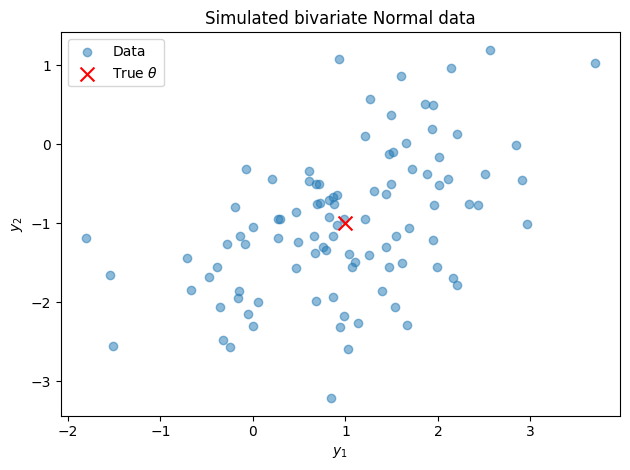

Posterior mean mu_n: [ 0.99397946 -1.00086867]
Posterior covariance Lambda_n:
 [[0.00996886 0.0049751 ]
 [0.0049751  0.00996886]]


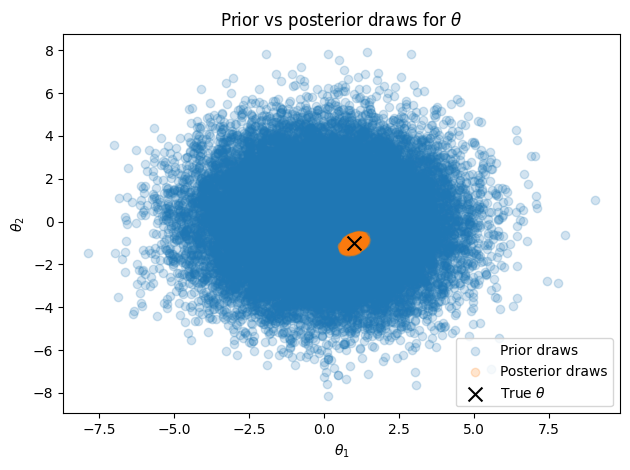

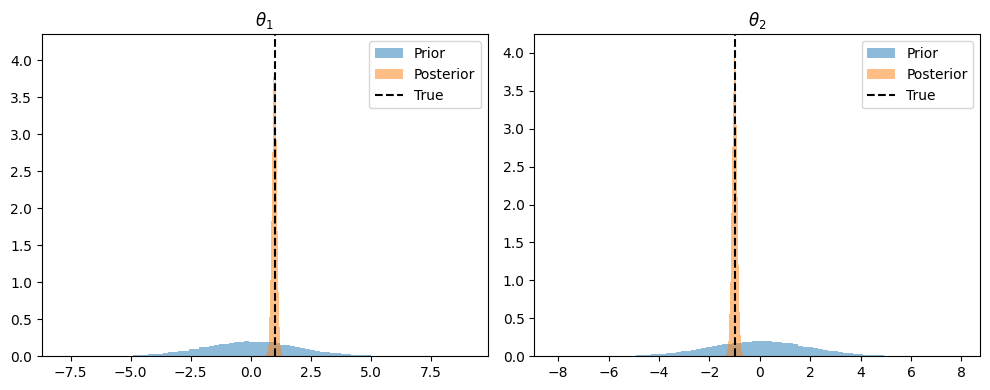

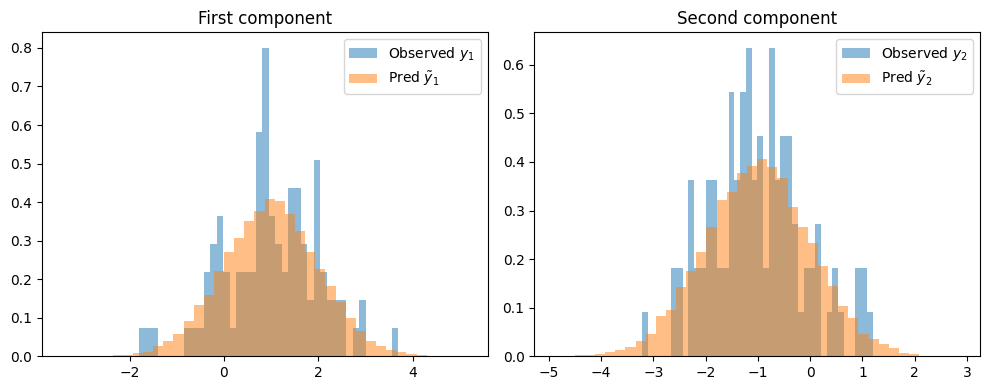

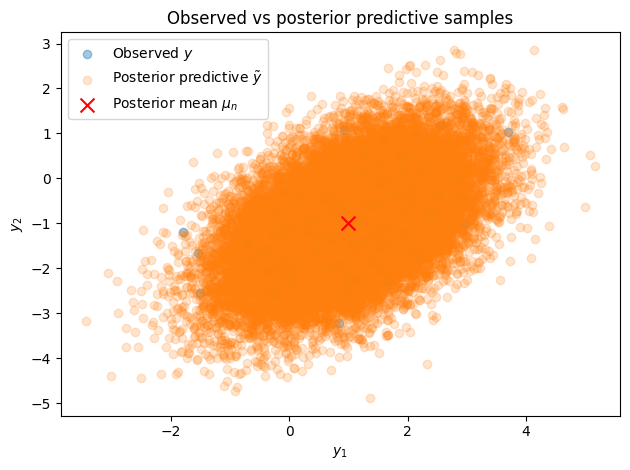

In [77]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(12345)

# --------------------------------------------------------
# 1. Set up true parameters and simulate data
# --------------------------------------------------------
p = 2
theta_true = np.array([1.0, -1.0])

rho = 0.5
sigma1 = 1.0
sigma2 = 1.0
Sigma = np.array([
    [sigma1**2,          rho * sigma1 * sigma2],
    [rho * sigma1 * sigma2, sigma2**2]
])

n = 100
y = rng.multivariate_normal(mean=theta_true, cov=Sigma, size=n)

# Quick scatter of the data
plt.figure()
plt.scatter(y[:, 0], y[:, 1], alpha=0.5, label="Data")
plt.scatter(theta_true[0], theta_true[1], c="red", marker="x", s=100,
            label=r"True $\theta$")
plt.xlabel(r"$y_1$")
plt.ylabel(r"$y_2$")
plt.title("Simulated bivariate Normal data")
plt.legend()
plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 2. Prior hyperparameters for theta ~ N_p(mu0, Lambda0)
# --------------------------------------------------------
mu0 = np.zeros(p)
Lambda0 = 4.0 * np.eye(p)  # fairly vague prior: variance 4 in each component

A0 = np.linalg.inv(Lambda0)   # prior precision
b0 = A0 @ mu0                 # prior canonical mean (here it's just zeros)

# --------------------------------------------------------
# 3. Posterior hyperparameters for theta | y, Sigma
# --------------------------------------------------------
Sigma_inv = np.linalg.inv(Sigma)

# Sufficient stats: sum of y's
sum_y = np.sum(y, axis=0)

A1 = n * Sigma_inv
b1 = Sigma_inv @ sum_y

A_n = A0 + A1
b_n = b0 + b1

Lambda_n = np.linalg.inv(A_n)
mu_n = Lambda_n @ b_n

print("Posterior mean mu_n:", mu_n)
print("Posterior covariance Lambda_n:\n", Lambda_n)

# --------------------------------------------------------
# 4. Sample from prior and posterior for theta
# --------------------------------------------------------
S = 30_000

theta_prior = rng.multivariate_normal(mean=mu0, cov=Lambda0, size=S)
theta_post  = rng.multivariate_normal(mean=mu_n, cov=Lambda_n, size=S)

# Plot prior vs posterior samples
plt.figure()
plt.scatter(theta_prior[:, 0], theta_prior[:, 1],
            alpha=0.2, label="Prior draws")
plt.scatter(theta_post[:, 0], theta_post[:, 1],
            alpha=0.2, label="Posterior draws")
plt.scatter(theta_true[0], theta_true[1], c="black", marker="x", s=100,
            label=r"True $\theta$")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")
plt.title("Prior vs posterior draws for $\\theta$")
plt.legend()
plt.tight_layout()
plt.show()

# Marginals for theta_1 and theta_2
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(theta_prior[:, 0], bins=80, density=True, alpha=0.5, label="Prior")
axes[0].hist(theta_post[:, 0],  bins=80, density=True, alpha=0.5, label="Posterior")
axes[0].axvline(theta_true[0], linestyle="--", color="k", label="True")
axes[0].set_title(r"$\theta_1$")
axes[0].legend()

axes[1].hist(theta_prior[:, 1], bins=80, density=True, alpha=0.5, label="Prior")
axes[1].hist(theta_post[:, 1],  bins=80, density=True, alpha=0.5, label="Posterior")
axes[1].axvline(theta_true[1], linestyle="--", color="k", label="True")
axes[1].set_title(r"$\theta_2$")
axes[1].legend()

plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 5. Posterior predictive: y_tilde
# --------------------------------------------------------
# Hierarchical simulation:
# draw theta^(s) ~ N(mu_n, Lambda_n)
# then y_tilde^(s) ~ N(theta^(s), Sigma)

theta_post_for_pred = rng.multivariate_normal(mean=mu_n, cov=Lambda_n, size=S)
y_pred = np.empty((S, p))
for s in range(S):
    y_pred[s] = rng.multivariate_normal(mean=theta_post_for_pred[s], cov=Sigma)

# Compare data and predictive in the first component
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(y[:, 0], bins=40, density=True, alpha=0.5, label="Observed $y_1$")
axes[0].hist(y_pred[:, 0], bins=40, density=True, alpha=0.5, label="Pred $\\tilde y_1$")
axes[0].set_title("First component")
axes[0].legend()

axes[1].hist(y[:, 1], bins=40, density=True, alpha=0.5, label="Observed $y_2$")
axes[1].hist(y_pred[:, 1], bins=40, density=True, alpha=0.5, label="Pred $\\tilde y_2$")
axes[1].set_title("Second component")
axes[1].legend()

plt.tight_layout()
plt.show()

# Optional: scatter of predictive vs observed
plt.figure()
plt.scatter(y[:, 0], y[:, 1], alpha=0.4, label="Observed $y$")
plt.scatter(y_pred[:, 0], y_pred[:, 1], alpha=0.2, label="Posterior predictive $\\tilde y$")
plt.scatter(mu_n[0], mu_n[1], c="red", marker="x", s=100, label=r"Posterior mean $\mu_n$")
plt.xlabel(r"$y_1$")
plt.ylabel(r"$y_2$")
plt.title("Observed vs posterior predictive samples")
plt.legend()
plt.tight_layout()
plt.show()

## Full conditional distribution of the covariance matrix

**The inverse-Wishart distribution.** The inverse-Wishart$(\nu_{0},S_{0}^{-1})$ density is given by

$$p(\Sigma)=[]^{-1} \times |\Sigma|^{-(\nu_{0}+p+1)/2}\times \exp\{-tr(S_{0}\Sigma^{-1})/2\}$$

**Posterior distribution.**

$$p(\Sigma|y_{1},\ldots,y_{n},\theta)\propto p(\Sigma)\times p(y_{1},\ldots,y_{n}|\theta,\Sigma)$$

$$\propto (|\Sigma|^{-(\nu_{0}+p+1)/2}\times \exp\{-tr(S_{0}\Sigma^{-1})/2\}) \times (|\Sigma|^{-n/2}\times \exp\{-tr(S_{\theta}\Sigma^{-1})/2\}$$

$$=  (|\Sigma|^{-((\nu_{0}+p+1+n)/2}\times \exp\{-tr([S_{0}+S_{\theta}]\Sigma^{-1})/2\} \sim \text{inverse-Wishart}(\nu_{0}+n,[S_{0}+S_{\theta}]^{-1})$$

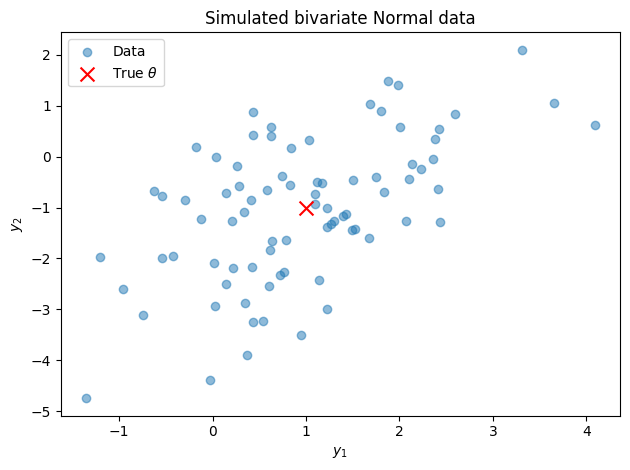

Posterior mean of theta: [ 0.95492215 -1.03454184]
True theta: [ 1. -1.]
Posterior mean of Sigma:
 [[1.13275789 0.83255797]
 [0.83255797 1.95679431]]
True Sigma:
 [[1.   0.75]
 [0.75 2.25]]


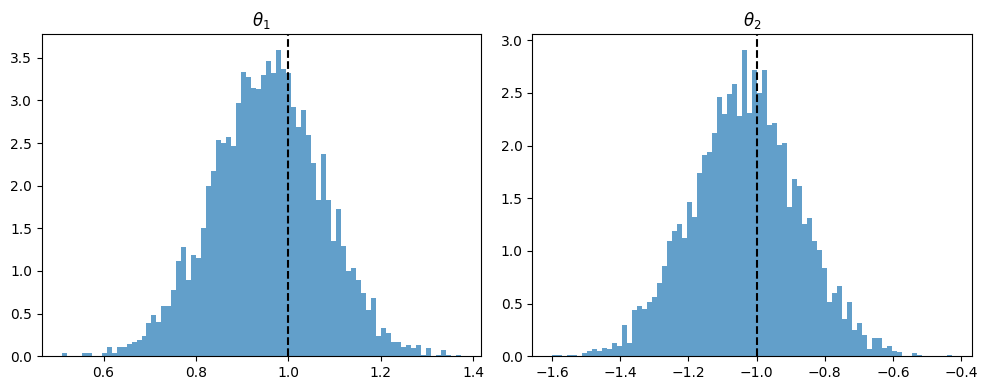

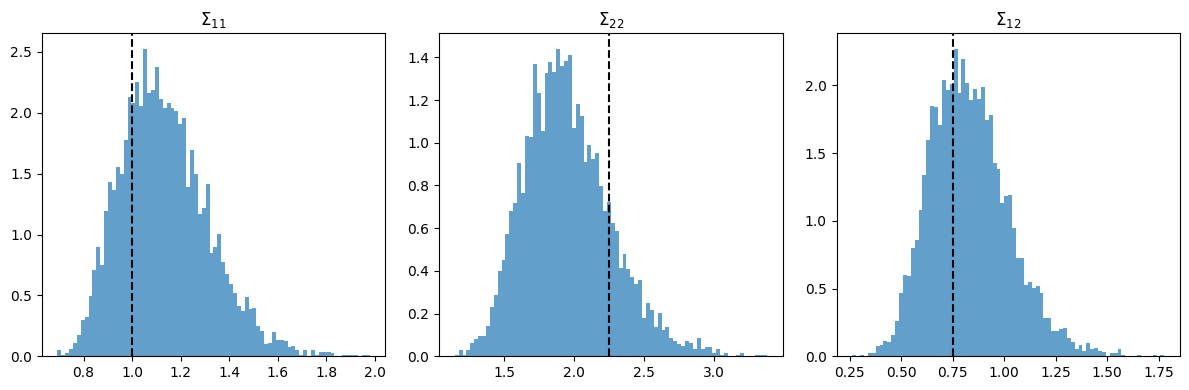

In [78]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(12345)

# --------------------------------------------------------
# 1. Simulate bivariate Normal data with unknown mean & covariance
# --------------------------------------------------------
p = 2
theta_true = np.array([1.0, -1.0])
rho = 0.5
sigma1 = 1.0
sigma2 = 1.5

Sigma_true = np.array([
    [sigma1**2,          rho * sigma1 * sigma2],
    [rho * sigma1 * sigma2, sigma2**2]
])

n = 80
y = rng.multivariate_normal(mean=theta_true, cov=Sigma_true, size=n)

plt.figure()
plt.scatter(y[:, 0], y[:, 1], alpha=0.5, label="Data")
plt.scatter(theta_true[0], theta_true[1], c="red", marker="x", s=100,
            label=r"True $\theta$")
plt.xlabel(r"$y_1$")
plt.ylabel(r"$y_2$")
plt.title("Simulated bivariate Normal data")
plt.legend()
plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 2. Prior: theta ~ N(mu0, Lambda0),  Sigma ~ IW(nu0, S0)
#    (standard IW: p(Sigma) ∝ |Sigma|^{-(nu0+p+1)/2} exp(-1/2 tr(S0 Sigma^{-1}))
# --------------------------------------------------------
mu0 = np.zeros(p)
Lambda0 = 4.0 * np.eye(p)  # fairly vague prior on theta
A0 = np.linalg.inv(Lambda0)
b0 = A0 @ mu0

nu0 = p + 2               # df > p - 1
S0 = np.eye(p)            # prior scale for Sigma

# --------------------------------------------------------
# 3. Helpers: Wishart and inverse-Wishart samplers
# --------------------------------------------------------
def r_wishart(df, V, rng):
    """
    Sample W ~ Wishart_p(df, V), with density ∝ |W|^{(df-p-1)/2} exp(-1/2 tr(V^{-1} W))
    """
    p = V.shape[0]
    L = np.linalg.cholesky(V)
    Z = rng.normal(size=(p, df))  # columns ~ N_p(0, I)
    W = L @ Z @ Z.T @ L.T
    return W

def r_invwishart(df, S, rng):
    """
    Sample Sigma ~ IW_p(df, S), meaning Sigma^{-1} ~ Wishart_p(df, S^{-1})
    """
    V = np.linalg.inv(S)
    W = r_wishart(df, V, rng)
    Sigma = np.linalg.inv(W)
    return Sigma

# --------------------------------------------------------
# 4. Gibbs sampler for (theta, Sigma)
# --------------------------------------------------------
T = 6000
burn = 1000

theta_samples = np.zeros((T, p))
Sigma_samples = np.zeros((T, p, p))

# initial values
theta_curr = y.mean(axis=0)
Sigma_curr = np.cov(y.T, bias=False)  # sample covariance

sum_y = y.sum(axis=0)

for t in range(T):
    # --- 4a. Sample Sigma | theta, y ~ IW(nu0 + n, S0 + S_theta) ---
    diff = y - theta_curr           # shape (n, p)
    S_theta = diff.T @ diff         # sum (y_i - theta)(y_i - theta)^T
    df_post = nu0 + n
    S_post = S0 + S_theta
    Sigma_curr = r_invwishart(df_post, S_post, rng)

    # --- 4b. Sample theta | Sigma, y ~ N(mu_n, Lambda_n) ---
    Sigma_inv = np.linalg.inv(Sigma_curr)
    A1 = n * Sigma_inv
    b1 = Sigma_inv @ sum_y
    A_n = A0 + A1
    b_n = b0 + b1
    Lambda_n = np.linalg.inv(A_n)
    mu_n = Lambda_n @ b_n

    theta_curr = rng.multivariate_normal(mean=mu_n, cov=Lambda_n)

    theta_samples[t] = theta_curr
    Sigma_samples[t] = Sigma_curr

# Discard burn-in
theta_post = theta_samples[burn:]
Sigma_post = Sigma_samples[burn:]

print("Posterior mean of theta:", theta_post.mean(axis=0))
print("True theta:", theta_true)
print("Posterior mean of Sigma:\n", Sigma_post.mean(axis=0))
print("True Sigma:\n", Sigma_true)

# --------------------------------------------------------
# 5. Some diagnostics/plots
# --------------------------------------------------------
# Theta marginals
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(theta_post[:, 0], bins=80, density=True, alpha=0.7)
axes[0].axvline(theta_true[0], linestyle="--", color="k")
axes[0].set_title(r"$\theta_1$")

axes[1].hist(theta_post[:, 1], bins=80, density=True, alpha=0.7)
axes[1].axvline(theta_true[1], linestyle="--", color="k")
axes[1].set_title(r"$\theta_2$")

plt.tight_layout()
plt.show()

# Sigma entries
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].hist(Sigma_post[:, 0, 0], bins=80, density=True, alpha=0.7)
axes[0].axvline(Sigma_true[0, 0], linestyle="--", color="k")
axes[0].set_title(r"$\Sigma_{11}$")

axes[1].hist(Sigma_post[:, 1, 1], bins=80, density=True, alpha=0.7)
axes[1].axvline(Sigma_true[1, 1], linestyle="--", color="k")
axes[1].set_title(r"$\Sigma_{22}$")

axes[2].hist(Sigma_post[:, 0, 1], bins=80, density=True, alpha=0.7)
axes[2].axvline(Sigma_true[0, 1], linestyle="--", color="k")
axes[2].set_title(r"$\Sigma_{12}$")

plt.tight_layout()
plt.show()

# Linear Regression

## The linear regression model

A linear regression model is a particular type of smoothly changing model for $p(y|x)$ that specifies that the conditional expectation $E[Y|x]$ has a form that is linear in a set of parameters:

$$\int yp(y|x)dy = E[Y|x]= \beta_{1} x_{1}+\ldots+\beta_{p}x_{p}=\beta^{\top}x$$

The normal linear regression model specifies that, in addition to $E[Y|x]$ being linear, the sampling variability around the mean is i.i.d. from a normal distribution:

$$\epsilon_{1},\ldots,\epsilon_{n} \sim i.i.d. normal(0,\sigma^2)$$

$$Y_{i} = \beta^{\top} x_{i}+\epsilon_{i}$$

$$p(y_{1},\ldots,y_{n}|x_{1},\ldots,x_{n},\beta,\sigma^2)=\prod _{i=1}^{n} p(y_{i}|x_{i},\beta,\sigma^2)=(2\pi \sigma^2)^{-n/2} \exp\{-\frac{1}{2}\sum_{i=1}^{n}(y_{i}-\beta^{\top}x_{i})^2\} \sim \{y|X,\beta,\sigma^2\}\sim \text{multivariate normal}(X\beta,\sigma^2 I)$$

$$SSR(\beta)=\sum (y_{i}-\beta^{\top} x_{i})^2=(y-X\beta)^{\top}(y-X\beta)=y^{\top}y-2\beta^{\top}X^{\top}y+\beta^{\top}X^{\top}X\beta$$

$$\frac{d}{d\beta}SSR(\beta)=-2X^{\top}y+2X^{\top}X\beta$$

$$\frac{d}{d \beta}SSR(\beta)=0 \Leftrightarrow -2X^{\top}y+2X^{\top}X\beta=0$$

$$ X^{\top}X\beta=X^{\top}y \Leftrightarrow \beta = (X^{\top}X)^{-1}X^{\top}y$$

## Bayesian estimation for a regression model

$$p(y|X,\beta,\sigma^2)\propto \exp\{-\frac{1}{2\sigma^2}SSR(\beta)\}= \exp\{-\frac{1}{2\sigma^2}[y^{\top}y-2\beta^{\top} X^{\top} y+\beta^{\top}X^{\top}X\beta]\}$$

**Conjugate prior distribution.**

$$\beta \sim \text{multivariate normal}(\beta_{0},\Sigma_{0}), \quad \gamma=1/\sigma^2\sim \text{gamma}(\nu_{0}/2,\nu_{0}\sigma_{0}^2/2)$$

**Posterior distribution.**

$$p(\beta|y,X,\sigma^2)\propto p(y|X,\beta,\sigma^2)\times p(\beta) \propto \exp\{-\frac{1}{2}(-2\beta^{\top}X^{\top}y/\sigma^2+\beta^{\top}X^{\top}X\beta/\sigma^2)-\frac{1}{2}(-2\beta^{\top}\Sigma_{0}^{-1}\beta_{0}+\beta^{\top}\Sigma_{0}^{-1}\beta)\}$$

$$=\exp\{\beta^{\top}(\Sigma_{0}^{-1}\beta_{0}+X^{\top}y/\sigma^2)-\frac{1}{2}\beta^{\top}(\Sigma_{0}^{-1}+X^{\top}X/\sigma^2)\beta\}$$

$$Var[\beta|y,X,\sigma^2]=(\Sigma_{0}^{-1}+X^{\top}X/\sigma^2)^{-1}, \quad E[\beta|y,X,\sigma^2]=(\Sigma_{0}^{-1}+X^{\top}X/\sigma^2)^{-1}(\Sigma_{0}^{-1}\beta_{0}+X^{\top}y/\sigma^2)$$

$$p(\gamma|y,X,\beta)\propto p(\gamma)p(y|X,\beta,\gamma)\propto [\gamma^{\nu_{0}/2-1}\exp(-\gamma\times \nu_{0}\sigma_{0}^2/2)] \times [\gamma^{n/2}\exp(-\gamma\times SSR(\beta)/2)] $$

$$= \gamma^{(\nu_{0}+n)/2-1}\exp(-\gamma[\nu_{0}^2\sigma_{0}^2+SSR(\beta)]/2)\sim \text{inverse-gamma}([\nu+n]/2,[\nu\sigma_{0}^2+SSR(\beta)]/2)$$

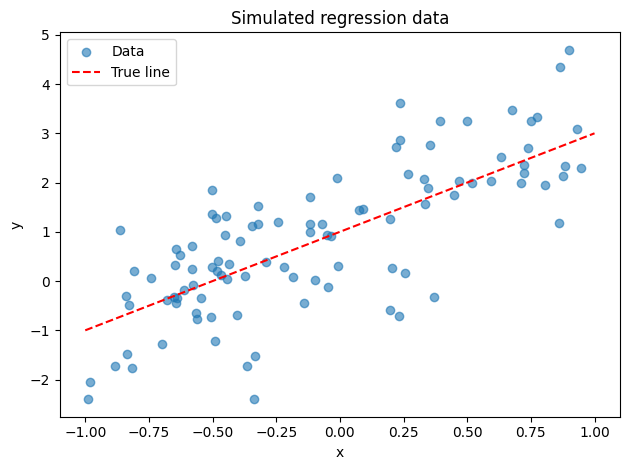

Posterior mean beta: [1.04469883 2.09308705]
True beta: [1. 2.]
Posterior mean sigma^2: 0.9756140597272999
True sigma^2: 1.0


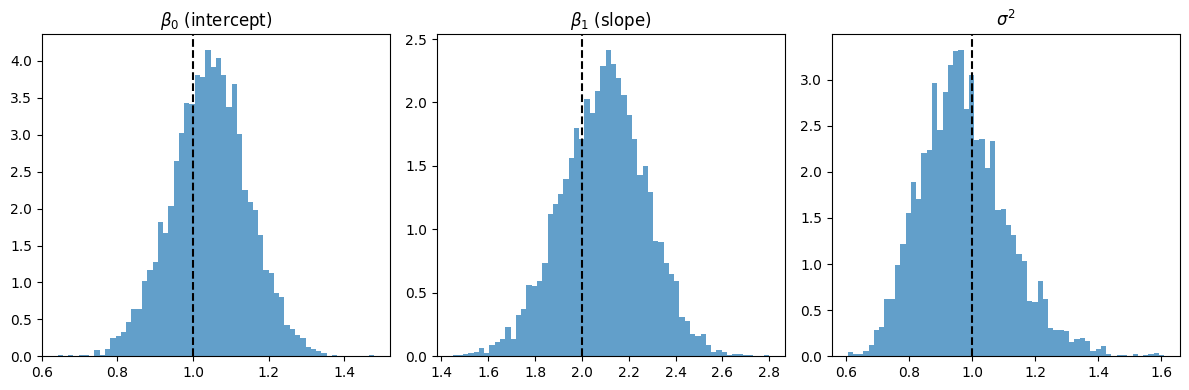

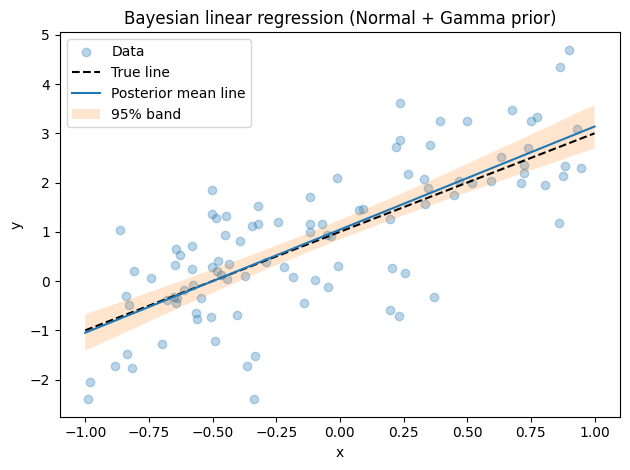

In [79]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(12345)

# --------------------------------------------------------
# 1. Simulate data from a simple linear regression
# --------------------------------------------------------
n = 100
x = rng.uniform(-1, 1, size=n)
X = np.column_stack([np.ones(n), x])  # [1, x]

beta_true = np.array([1.0, 2.0])  # intercept, slope
sigma_true = 1.0
gamma_true = 1.0 / sigma_true**2

y = X @ beta_true + rng.normal(0.0, sigma_true, size=n)

plt.figure()
plt.scatter(x, y, alpha=0.6, label="Data")
grid = np.linspace(-1, 1, 100)
plt.plot(grid, beta_true[0] + beta_true[1] * grid, "r--", label="True line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Simulated regression data")
plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 2. Priors: beta ~ N(beta0, Sigma0), gamma ~ Gamma(nu0/2, nu0*sigma0^2/2)
# --------------------------------------------------------
p = X.shape[1]
beta0 = np.zeros(p)
Sigma0 = 10.0**2 * np.eye(p)   # fairly vague prior on beta
Sigma0_inv = np.linalg.inv(Sigma0)

nu0 = 4.0
sigma0_sq = 1.0   # prior scale for sigma^2

shape0 = nu0 / 2.0
rate0 = nu0 * sigma0_sq / 2.0   # rate
scale0 = 1.0 / rate0            # for numpy's gamma (shape, scale)

# --------------------------------------------------------
# 3. Precompute sufficient stats
# --------------------------------------------------------
XtX = X.T @ X
Xty = X.T @ y

# --------------------------------------------------------
# 4. Gibbs sampler for (beta, gamma)
# --------------------------------------------------------
T = 6000
burn = 1000

beta_samples = np.zeros((T, p))
gamma_samples = np.zeros(T)

# Initial values
beta_curr = np.linalg.lstsq(X, y, rcond=None)[0]  # OLS start
gamma_curr = 1.0 / np.var(y - X @ beta_curr)

for t in range(T):
    # --- 4a. Sample gamma | beta, y, X ---
    resid = y - X @ beta_curr
    SSR = np.dot(resid, resid)
    shape_n = (nu0 + n) / 2.0
    rate_n = (nu0 * sigma0_sq + SSR) / 2.0
    gamma_curr = rng.gamma(shape=shape_n, scale=1.0 / rate_n)

    # --- 4b. Sample beta | gamma, y, X ---
    Sigma_n_inv = Sigma0_inv + gamma_curr * XtX
    Sigma_n = np.linalg.inv(Sigma_n_inv)
    beta_n = Sigma_n @ (Sigma0_inv @ beta0 + gamma_curr * Xty)
    beta_curr = rng.multivariate_normal(mean=beta_n, cov=Sigma_n)

    beta_samples[t] = beta_curr
    gamma_samples[t] = gamma_curr

# Discard burn-in
beta_post = beta_samples[burn:]
gamma_post = gamma_samples[burn:]
sigma_sq_post = 1.0 / gamma_post

print("Posterior mean beta:", beta_post.mean(axis=0))
print("True beta:", beta_true)
print("Posterior mean sigma^2:", sigma_sq_post.mean())
print("True sigma^2:", sigma_true**2)

# --------------------------------------------------------
# 5. Posterior histograms
# --------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].hist(beta_post[:, 0], bins=60, density=True, alpha=0.7)
axes[0].axvline(beta_true[0], linestyle="--", color="k")
axes[0].set_title(r"$\beta_0$ (intercept)")

axes[1].hist(beta_post[:, 1], bins=60, density=True, alpha=0.7)
axes[1].axvline(beta_true[1], linestyle="--", color="k")
axes[1].set_title(r"$\beta_1$ (slope)")

axes[2].hist(sigma_sq_post, bins=60, density=True, alpha=0.7)
axes[2].axvline(sigma_true**2, linestyle="--", color="k")
axes[2].set_title(r"$\sigma^2$")

plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 6. Posterior regression line (mean) with credible band
# --------------------------------------------------------
grid = np.linspace(-1, 1, 100)
X_grid = np.column_stack([np.ones_like(grid), grid])
y_mean_samples = X_grid @ beta_post.T   # shape (len(grid), draws)

y_mean = y_mean_samples.mean(axis=1)
y_lower = np.percentile(y_mean_samples, 2.5, axis=1)
y_upper = np.percentile(y_mean_samples, 97.5, axis=1)

plt.figure()
plt.scatter(x, y, alpha=0.3, label="Data")
plt.plot(grid, beta_true[0] + beta_true[1] * grid, "k--", label="True line")
plt.plot(grid, y_mean, label="Posterior mean line")
plt.fill_between(grid, y_lower, y_upper, alpha=0.2, label="95% band")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Bayesian linear regression (Normal + Gamma prior)")
plt.tight_layout()
plt.show()